In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [11]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [13]:
train = pd.read_csv('CIC_IoMT_2024_WiFi_MQTT_train.csv')

In [15]:
le = LabelEncoder()
train['label'] = le.fit_transform(train['label'])

In [17]:
X = train.drop(columns=['label'])
y = train['label']

In [19]:
print(X.dtypes)

Header_Length      float64
Protocol Type      float64
Duration           float64
Rate               float64
Srate              float64
Drate                int64
fin_flag_number    float64
syn_flag_number    float64
rst_flag_number    float64
psh_flag_number    float64
ack_flag_number    float64
ece_flag_number    float64
cwr_flag_number    float64
ack_count          float64
syn_count          float64
fin_count          float64
rst_count          float64
HTTP               float64
HTTPS              float64
DNS                float64
Telnet             float64
SMTP               float64
SSH                float64
IRC                float64
TCP                float64
UDP                float64
DHCP               float64
ARP                float64
ICMP               float64
IGMP               float64
IPv                float64
LLC                float64
Tot sum            float64
Min                float64
Max                float64
AVG                float64
Std                float64
T

In [21]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X,y)

RandomForestClassifier(random_state=42)

In [27]:
n_features = X.shape[1]
feature_scores = np.zeros(n_features)

for tree in rf.estimators_:
    tree_ = tree.tree_
    for node in range(tree_.node_count):
        feature = tree_.feature[node]
        
        if feature ==-2:
            continue

        left = tree_.children_left[node]
        right = tree_.children_right[node]

        n_node_samples = tree_.n_node_samples[node]
        impurity_before = tree_.impurity[node]
        impurity_left = tree_.impurity[left]
        impurity_right = tree_.impurity[right]
        n_left = tree_.n_node_samples[left]
        n_right = tree_.n_node_samples[right]

        impurity_after = (n_left*impurity_left + n_right*impurity_right)/n_node_samples
        importance_score = (impurity_before - impurity_after) * n_node_samples
        feature_scores[feature] += importance_score

In [29]:
feature_scores = feature_scores/feature_scores.sum()

final_scores = pd.Series(feature_scores,index=X.columns).sort_values(ascending=False)

In [31]:
num_features = len(final_scores)
width_per_feature = 0.2
fig_width = max(15,num_features*width_per_feature)

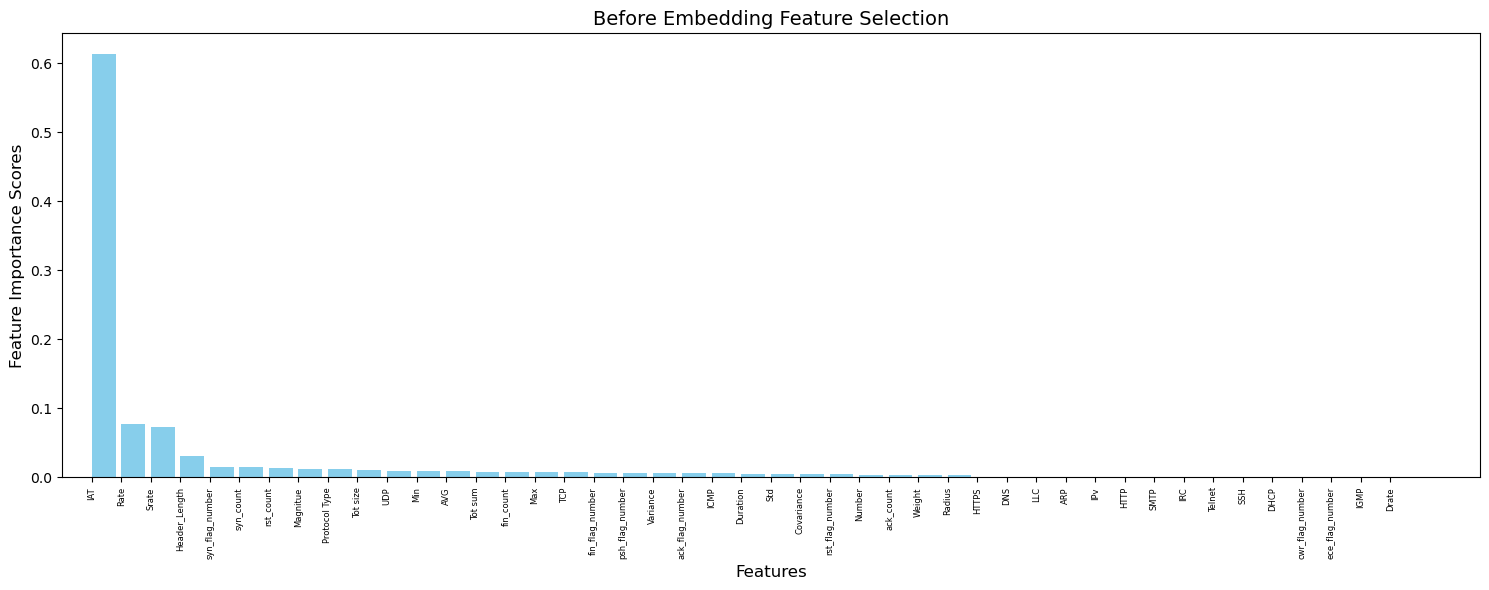

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(fig_width,6))
plt.bar(final_scores.index,final_scores.values,color='skyblue',align='edge')
plt.xticks(rotation=90,fontsize=6)
plt.xlabel("Features",fontsize=12)
plt.ylabel("Feature Importance Scores",fontsize=12)
plt.title("Before Embedding Feature Selection",fontsize=14)
plt.xlim(left=-1)
plt.tight_layout()
plt.show()

In [39]:
contributing_features = final_scores[final_scores>0.0]
unimportant_features = final_scores[final_scores<=0.0]

In [41]:
print(f"Original feature count: {len(final_scores)}")
print(f"Filtered feature count: {len(contributing_features)}")
print(f"Unimportant feature count: {len(unimportant_features)}")

Original feature count: 45
Filtered feature count: 44
Unimportant feature count: 1


In [43]:
unimportant_features

Drate    0.0
dtype: float64

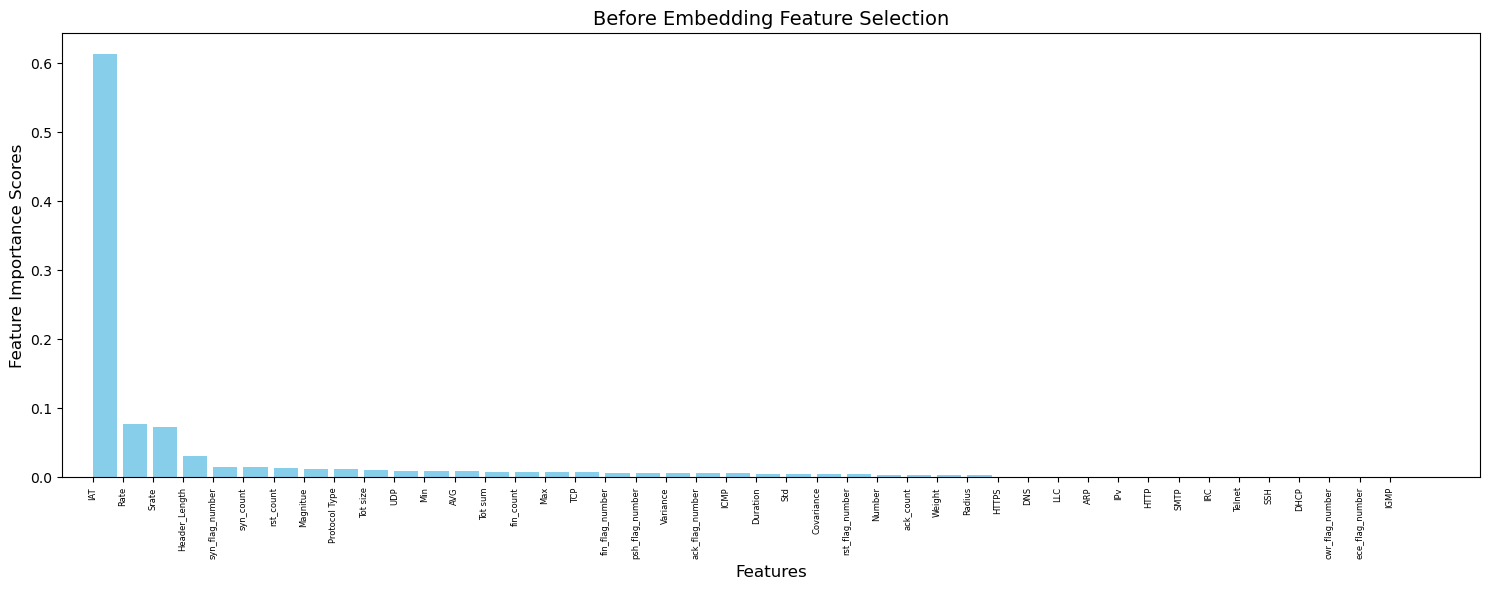

In [47]:
num_features = len(contributing_features)
width_per_feature = 0.2
fig_width = max(15,num_features*width_per_feature)
plt.figure(figsize=(fig_width,6))
plt.bar(contributing_features.index,contributing_features.values,color='skyblue',align='edge')
plt.xticks(rotation=90,fontsize=6)
plt.xlabel("Features",fontsize=12)
plt.ylabel("Feature Importance Scores",fontsize=12)
plt.title("Before Embedding Feature Selection",fontsize=14)
plt.xlim(left=-1)
plt.tight_layout()
plt.show()

In [49]:
contributing_features.to_csv("CICIoMT.csv")